In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

In [2]:
function plot_sample_means(;
        distx = Exponential(),
        disty = Exponential(),
        m = 10,
        n = 10, 
        L = 10^6
    )
    @show distx disty m n

    @show Δμ = mean(distx) - mean(disty)
    @show se = √(var(distx)/m + var(disty)/n)

    X̄ = zeros(L)
    Ȳ = zeros(L)

    Threads.@threads for i in 1:L
        X = rand(distx, m)
        Y = rand(disty, n)
        X̄[i] = mean(X)
        Ȳ[i] = mean(Y)
    end

    P1 = plot()
    stephist!(X̄; norm=true, label="size-$m sample mean of distx")
    plot!(Normal(mean(distx), std(distx)/√m); label="normal approx.", ls=:dash)

    P2 = plot()
    stephist!(Ȳ; norm=true, label="size-$n sample mean of disty")
    plot!(Normal(mean(disty), std(disty)/√n); label="normal aporox.", ls=:dash)

    P3 = plot()
    stephist!(X̄ - Ȳ; norm=true, label="diff. of sample means")
    plot!(Normal(Δμ, se); label="normal aporox.", ls=:dash)

    plot(P1, P2, P3; size=(600, 700), layout=(3, 1))
end

plot_sample_means (generic function with 1 method)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=1.0)
m = 10
n = 10
Δμ = mean(distx) - mean(disty) = 0.0
se = √(var(distx) / m + var(disty) / n) = 0.4472135954999579


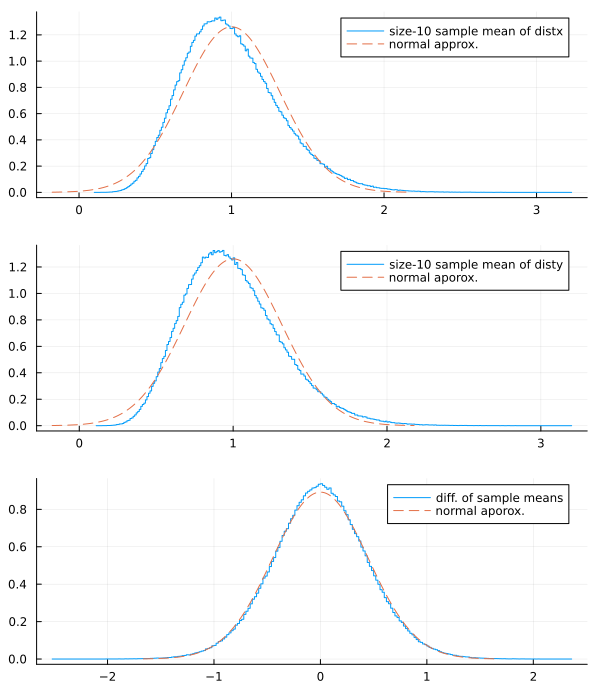

In [3]:
plot_sample_means(distx=Exponential(1), disty=Exponential(1), m=10, n=10)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=1.0)
m = 7
n = 13
Δμ = mean(distx) - mean(disty) = 0.0
se = √(var(distx) / m + var(disty) / n) = 0.4688072309384954


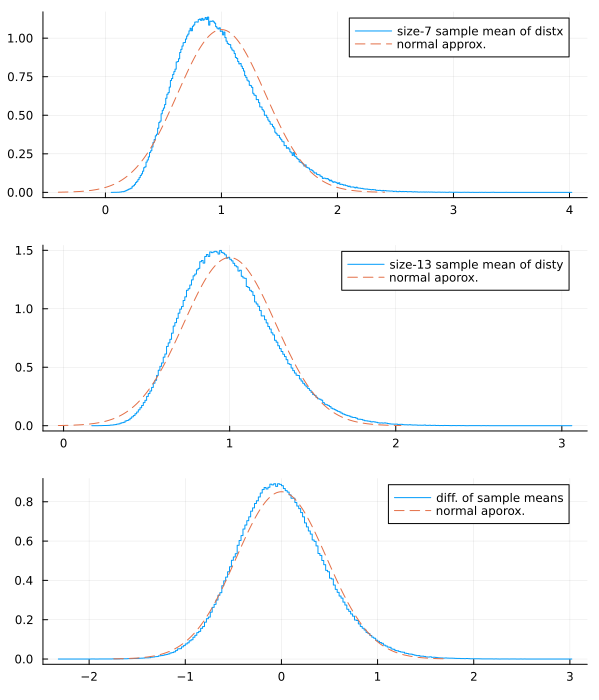

In [4]:
plot_sample_means(distx=Exponential(1), disty=Exponential(1), m=7, n=13)

distx = Exponential{Float64}(θ=2.0)
disty = Exponential{Float64}(θ=1.0)
m = 10
n = 10
Δμ = mean(distx) - mean(disty) = 1.0
se = √(var(distx) / m + var(disty) / n) = 0.7071067811865476


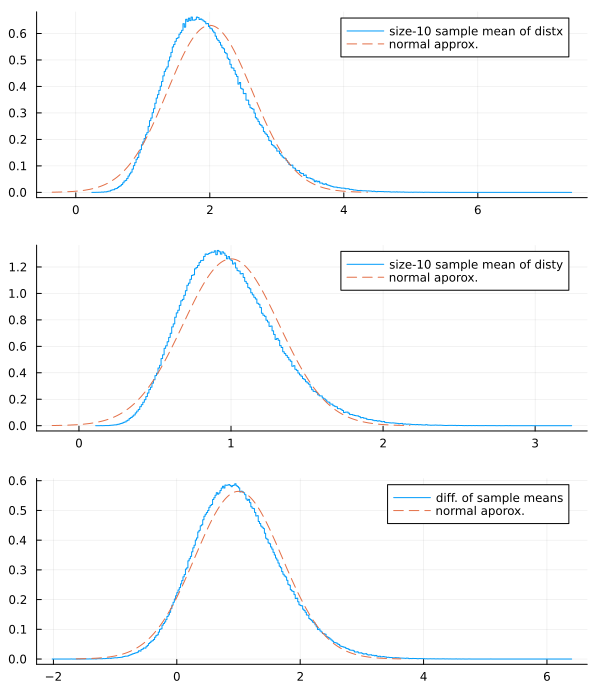

In [5]:
plot_sample_means(distx=Exponential(2), disty=Exponential(1), m=10, n=10)

distx = Exponential{Float64}(θ=2.0)
disty = Exponential{Float64}(θ=1.0)
m = 7
n = 13
Δμ = mean(distx) - mean(disty) = 1.0
se = √(var(distx) / m + var(disty) / n) = 0.8052028616141701


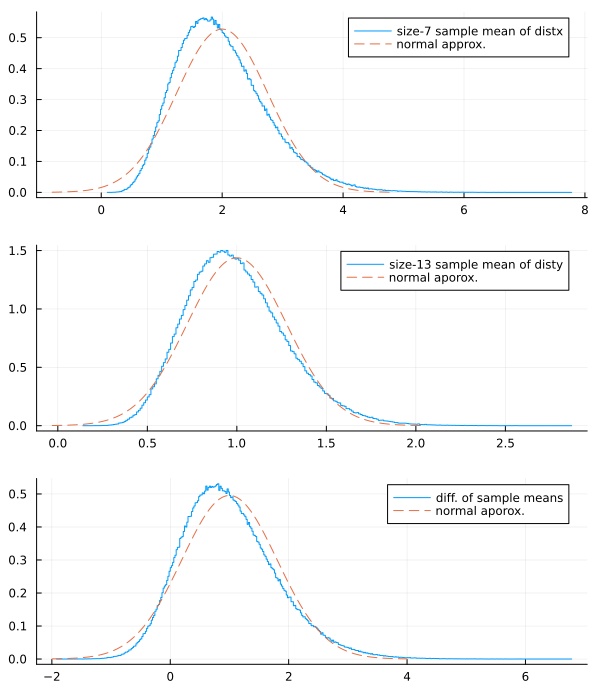

In [6]:
plot_sample_means(distx=Exponential(2), disty=Exponential(1), m=7, n=13)

distx = Exponential{Float64}(θ=2.0)
disty = Exponential{Float64}(θ=1.0)
m = 13
n = 7
Δμ = mean(distx) - mean(disty) = 1.0
se = √(var(distx) / m + var(disty) / n) = 0.6712298045747451


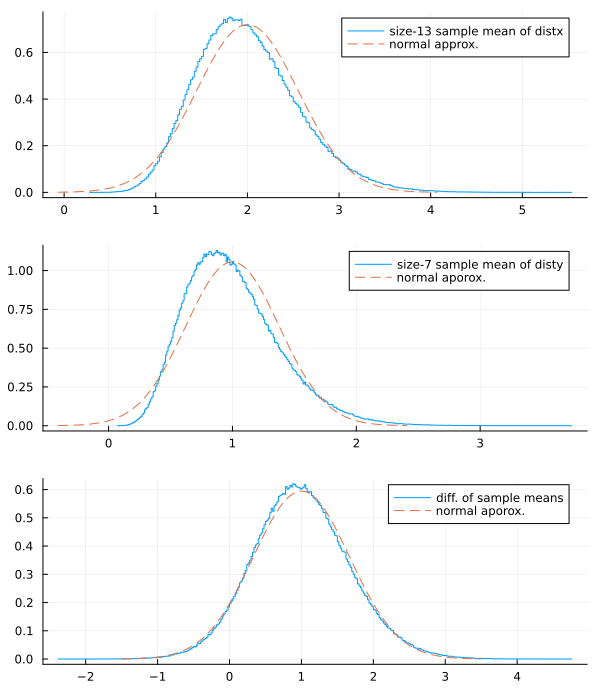

In [7]:
plot_sample_means(distx=Exponential(2), disty=Exponential(1), m=13, n=7)

In [8]:
using LinearAlgebra
using Distributions
using StatsPlots
default(fmt=:png)
using StaticArrays
using Random

function sim(x, β, dist, d; L=10^6)
    f(x) = evalpoly(x, β)
    n, r = length(x), d+1
    y0 = f.(x)
    A = x .^ (0:d)'
    ginvA = (A'A)\A'
    utmp = [zeros(n) for _ in 1:Threads.nthreads()]
    y = [zeros(n) for _ in 1:Threads.nthreads()]
    b = [zeros(r) for _ in 1:Threads.nthreads()]
    β̂ = zeros(r, L)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        u = rand!(dist, utmp[tid])
        @. y[tid] = y0 + u
        mul!(b[tid], ginvA, y[tid])
        β̂[:, i] .= b[tid]
    end
    β̂
end

rd(x; sigdigits=4) = round(x; sigdigits)

function plot_sim(x, β, dist, d; L=10^6)
    f(x) = evalpoly(x, β)
    n, r = length(x), d+1
    y0 = f.(x)
    A = x .^ (0:d)'
    
    β̂ = sim(x, β, dist, d; L)
    
    PP = []
    
    @show dist mean(dist) std(dist)
    println()
    P = plot(dist; label="residual dist.")
    push!(PP, P)
    
    u = rand(dist, n)
    y = y0 + u
    P = scatter(x, y; label="example of data", msc=:auto, ms=3)
    plot!(f, extrema(x)...; label="f(x)", ls=:dash)
    push!(PP, P)
    
    @show β
    @show meanβ̂ = rd.(vec(mean(β̂; dims=2)))
    @show rd.(std(dist) * .√diag(inv(A'A)))
    @show stdβ̂ = rd.(vec(std(β̂; dims=2)))
    println()
    
    for i in 1:r
        P = stephist(β̂[i, :]; norm=true, label="betahat[$(i)]")
        plot!(Normal(meanβ̂[i], stdβ̂[i]); label="normal approx.", ls=:dash)
        push!(PP, P)
    end

    @show n d
    
    h = 1 + (r+1) ÷ 2
    plot(PP...; size=(800, 250h), layout=(h, 2))
end

plot_sim (generic function with 1 method)

dist = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -1.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.7071067811865476

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-1.733e-5, 1.0, 8.431e-6, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2319, 0.2044, 0.04783, 0.02889]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2316, 0.2043, 0.04776, 0.02886]

n = 21
d = 3


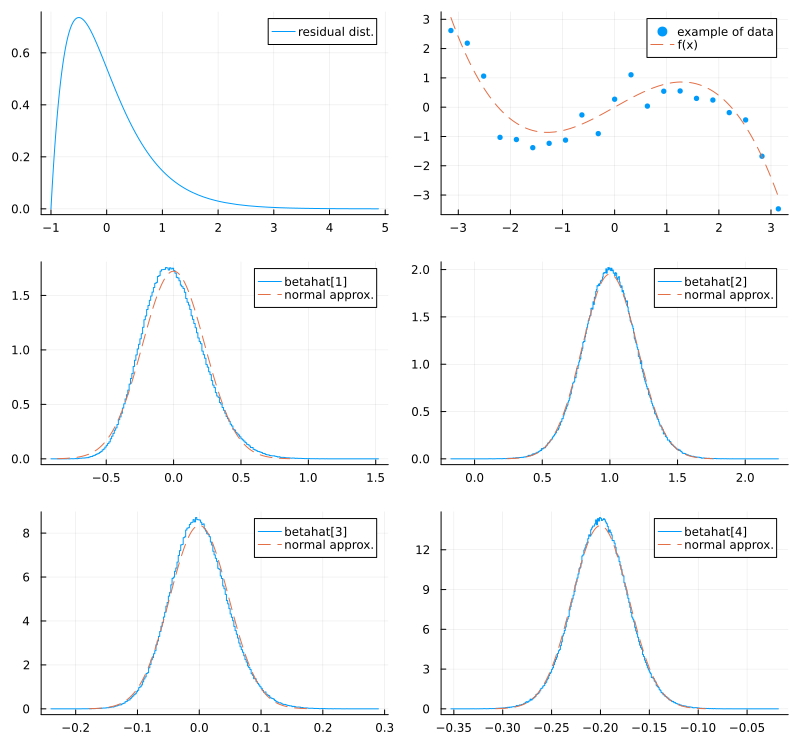

In [9]:
x = π * (-1:0.1:1)
β = [0, 1, 0, -0.2]
_dist = Gamma(2, 0.5)
dist = _dist - mean(_dist)
d = 3

plot_sim(x, β, dist, d; L=10^6)

dist = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -1.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.7071067811865476

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-5.313e-5, 1.0, 7.938e-5, -0.1999, -1.122e-5, -9.837e-6]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2909, 0.3624, 0.1704, 0.134, 0.0177, 0.011]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.291, 0.3622, 0.1702, 0.1339, 0.01769, 0.01099]

n = 21
d = 5


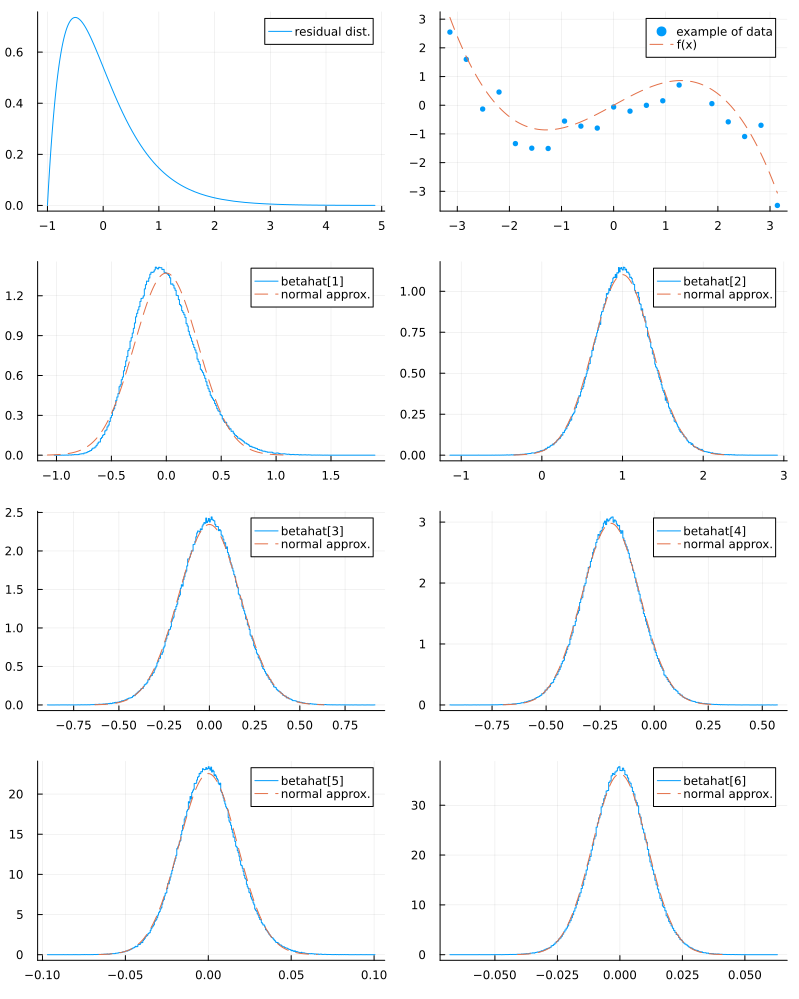

In [10]:
x = π * (-1:0.1:1)
β = [0, 1, 0, -0.2]
_dist = Gamma(2, 0.5)
dist = _dist - mean(_dist)
d = 5

plot_sim(x, β, dist, d; L=10^6)

dist = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -1.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.7071067811865476

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [0.0002134, 0.9996, -0.0001086, -0.1997, 7.593e-6, -4.962e-5, -5.279e-7, 2.472e-6]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.3412, 0.5539, 0.3934, 0.3847, 0.102, 0.07643, 0.006933, 0.004447]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.3415, 0.5542, 0.3937, 0.3849, 0.102, 0.07647, 0.006931, 0.00445]

n = 21
d = 7


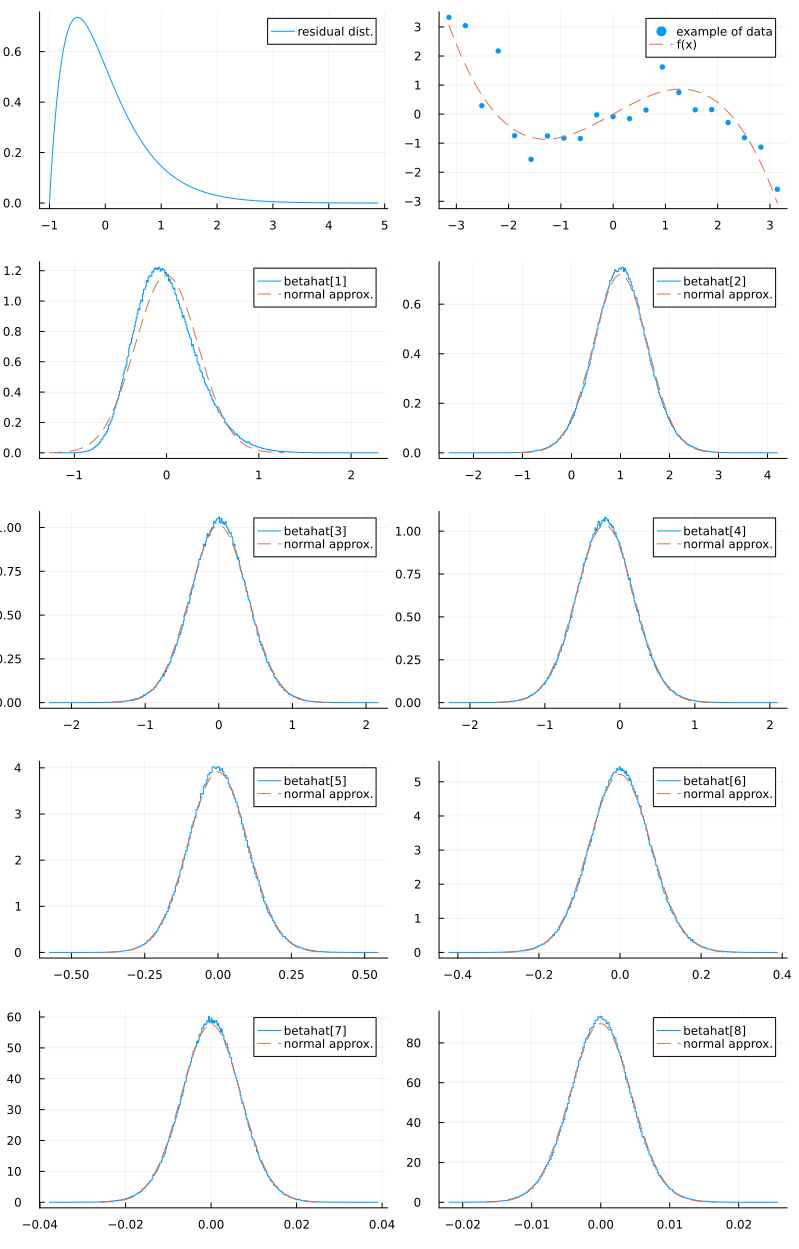

In [11]:
x = π * (-1:0.1:1)
β = [0, 1, 0, -0.2]
_dist = Gamma(2, 0.5)
dist = _dist - mean(_dist)
d = 7

plot_sim(x, β, dist, d; L=10^6)

dist = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -1.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.7071067811865476

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-1.48e-5, 1.0, -8.883e-6, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.4928, 0.4277, 0.07659, 0.04808]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.4929, 0.4276, 0.07656, 0.04809]

n = 5
d = 3


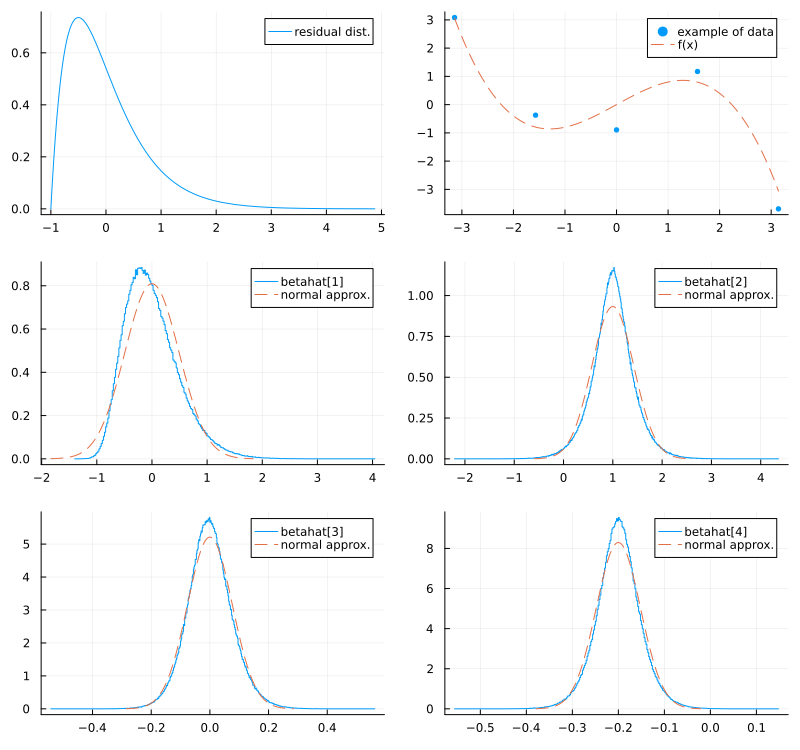

In [12]:
x = π * (-1:0.5:1)
β = [0, 1, 0, -0.2]
_dist = Gamma(2, 0.5)
dist = _dist - mean(_dist)
d = 3

plot_sim(x, β, dist, d; L=10^6)

dist = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -1.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.7071067811865476

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [9.152e-5, 1.0, -9.034e-6, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.3221, 0.2765, 0.06115, 0.03627]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.3222, 0.2764, 0.06105, 0.03626]

n = 11
d = 3


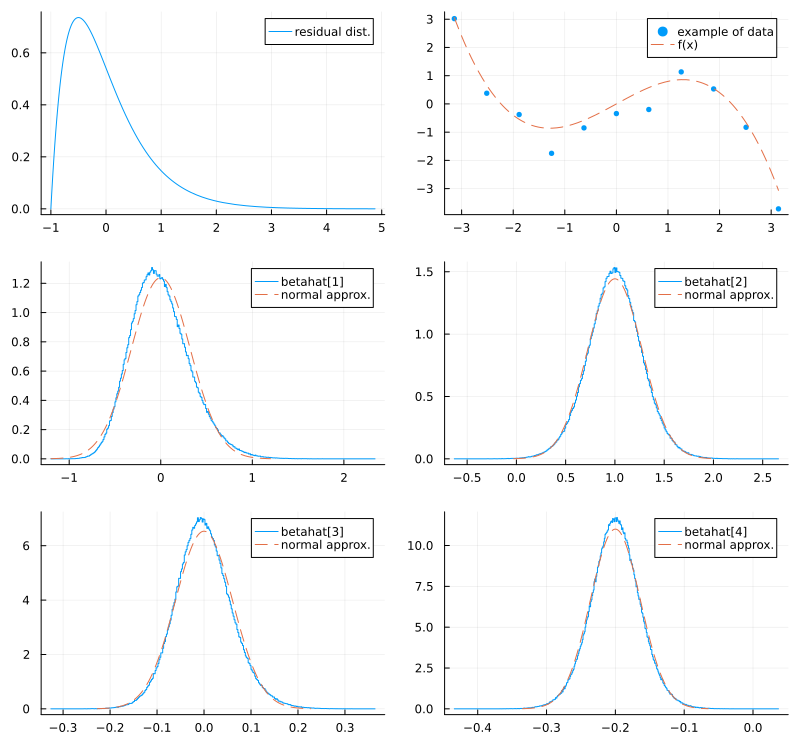

In [13]:
x = π * (-1:0.2:1)
β = [0, 1, 0, -0.2]
_dist = Gamma(2, 0.5)
dist = _dist - mean(_dist)
d = 3

plot_sim(x, β, dist, d; L=10^6)

dist = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.5
σ: 1.0
ρ: Exponential{Float64}(θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [7.296e-5, 0.9999, 3.061e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2277, 0.1955, 0.04324, 0.02565]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2282, 0.1955, 0.0433, 0.02566]

n = 11
d = 3


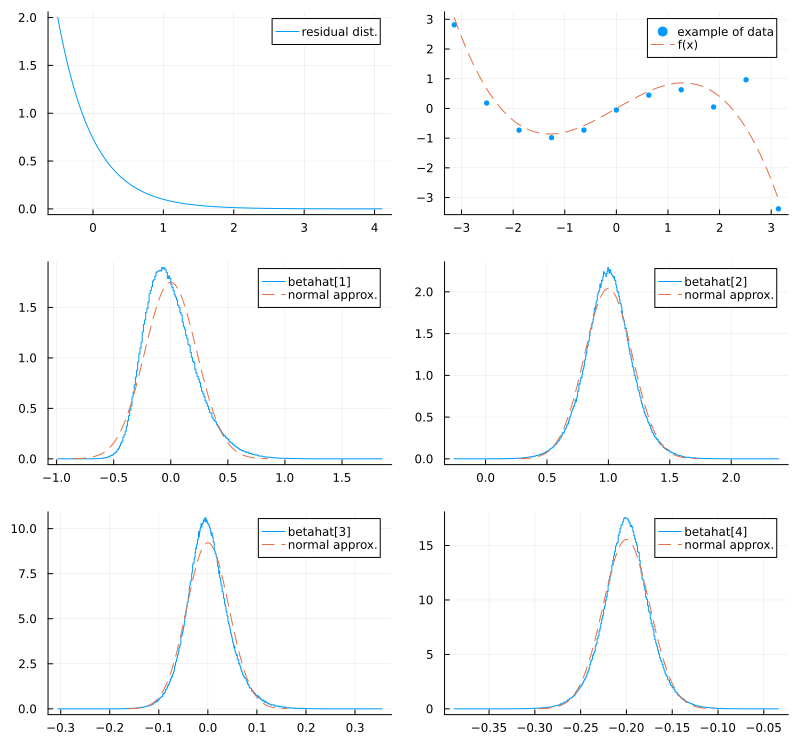

In [14]:
x = π * (-1:0.2:1)
β = [0, 1, 0, -0.2]
_dist = Exponential(0.5)
dist = _dist - mean(_dist)
d = 3

plot_sim(x, β, dist, d; L=10^6)

dist = Normal{Float64}(μ=0.0, σ=0.5)
mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-0.0002784, 1.0, 3.976e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2277, 0.1955, 0.04324, 0.02565]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2279, 0.1953, 0.04326, 0.02562]

n = 11
d = 3


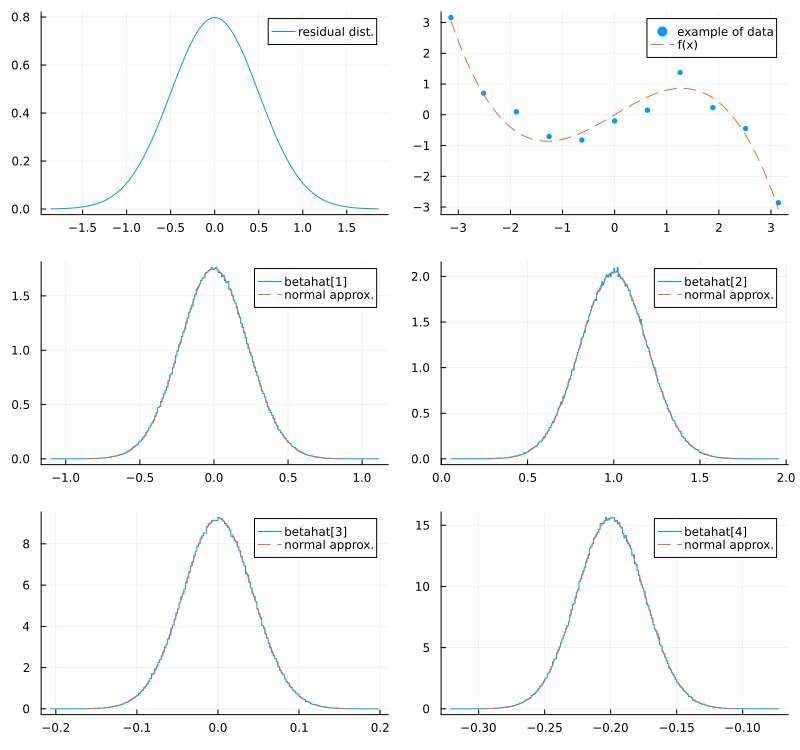

In [15]:
x = π * (-1:0.2:1)
β = [0, 1, 0, -0.2]
_dist = Normal(0, 0.5)
dist = _dist - mean(_dist)
d = 3

plot_sim(x, β, dist, d; L=10^6)